# Day 3: Geospatial web services and Interactive maps

### What is Geospatial Web Services? 

”A Web service that provides access to, or data processing on, geographic information. The OGC WebFeature Service (WFS), Web Map Service (WMS) are examples of geospatial Web service.” [IGI Global](https://www.igi-global.com/chapter/geospatial-interoperability/13798)

The Open Geospatial Consortium [OGC](https://www.ogc.org) is an international not for profit organization committed to making quality [open standards](https://www.ogc.org/docs/is) for the global geospatial community. 

Web Map Service (WMS)::: provides pre-assembled maps (may contain both vector and raster) to a requesting client. Map is usually generated upon request or cached.

Web Feature Service (WFS)::: allows clients to request raw vector data. May allow creating, editing, and deleting features on the server.


# Part 1: how to retrieve geographical data 

**We are going to retrieve geographical data from a popular platform called OpenStreetMap**

[OpenStreetMap](https://www.openstreetmap.org/) is a collaborative mapping project, which aims at creating a free editable map of the world. More about it [here](https://en.wikipedia.org/wiki/OpenStreetMap).

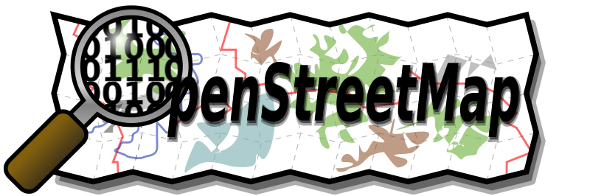

### Required modules for this session
- osmnx
- folium
- matplotlib

OSMnx module allows you to retrieve OpenStreetMap data using [OverPass API](https://wiki.openstreetmap.org/wiki/Overpass_API).

We will download and visualize OSM data covering a specified area of interest in Copenhagen.

OSMnx allows you to specify an address to retrieve the OpenStreetMap data around that area. Couldn’t be better!

In [ ]:
# import neccesary modules
# osmnx is easy to use for downloading OpenStreetMap data
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
place_adr = "Christianshavn, Copenhagen, Denmark"

# Fetch OSM street network from the address
graph = ox.graph_from_address(place_adr, distance=1000)
type(graph)


In [ ]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

In [ ]:
# Retrieve the footprint of the address
area = ox.gdf_from_place(place_adr)

# Retrieve buildings from the area
buildings = ox.footprints_from_address(place_adr, distance=1000)

ox.footprints_from_address(place_adr, distance=1000)


# What types are those?
print(type(area))
print(type(buildings))

In [ ]:
fig, ax = ox.plot_footprints(buildings)

Let’s also retrieve restaurants that are located on the area:

In [ ]:
# Retrieve restaurants
restaurants = ox.pois_from_address(place_adr, amenities=['restaurant'], distance= 1000)

# How many restaurants do we have?
len(restaurants)


Let’s explore what kind of attributes we have in our restaurants GeoDataFrame

In [ ]:
# Available columns
restaurants.columns

In [ ]:
buildings.columns

In [ ]:
# Select some useful cols and print
cols = ['alt_name', 'cuisine', 'opening_hours', 'outdoor_seating',
        'phone', 'wheelchair', 'geometry']
# Print only selected cols
restaurants[cols].head(12)

We can now plot all these different OSM layers by using the familiar ``plot()`` function of Geopandas. As you might remember, the street network data was not in GeoDataFrame format (it was networkx.MultiDiGraph). Luckily, osmnx provides a convenient function ``graph_to_gdfs()`` that can convert the graph into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edge.



**Let’s extract the nodes and edges from the graph as GeoDataFrames:**


In [ ]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)
print("Nodes:\n", nodes.head(), '\n')
print("Edges:\n", edges.head(), '\n')
print("Type:", type(edges))

Let’s create a map out of the `streets`, `buildings`, `restaurants`, and the area of Polygon but let’s exclude the nodes (to keep the figure clearer).

In [ ]:
# Plot the footprint 

ax = area.plot(facecolor='white')

# Plot streets
edges.plot(ax=ax, linewidth=1, edgecolor=None)

# Plot buildings
buildings.plot(ax=ax, facecolor='black', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='red', alpha=0.7, markersize=10)
plt.tight_layout()

# let's export a map from the area
outfp = "map.pdf"
plt.savefig(outfp, dpi=300)

## 🏋 Exercise

find restaurants that they have ``payment:bitcoin`` and export a map of them.

# Part 2: how to make interactive maps

### Why interactive maps?
Static maps have been there forever, but it is the era of interactive maps so that the user can interact with them and explore more.

Most interactive maps are made with [Leaflet](https://leafletjs.com) or [OpenLayers](https://openlayers.org) JavaScipt library. JavaScript (JS) is a programming language mostly used for adding interactive content (zoom-able, pan-able maps) on webpages.

[Folium](https://python-visualization.github.io/folium/quickstart.html) library helps you to visualize data on an interactive Leaflet map.


In [ ]:
# First, we are going to make a simple interactive web-map with no data on it. 
# We are going to visualize OpenStreetMap for Copenhagen.

import folium

# Create a Map instance
m = folium.Map(location=[55.67, 12.57],
    zoom_start=14, control_scale=True)
m

### Let's check Folium's help 
You can see what tiles you can visualize as basemap in your map such as:
- "OpenStreetMap"
- "Mapbox Bright" (Limited levels of zoom for free tiles)
- "Mapbox Control Room" (Limited levels of zoom for free tiles)
- "Stamen" (Terrain, Toner, and Watercolor)
- "Cloudmade" (Must pass API key)
- "Mapbox" (Must pass API key)
- "CartoDB" (positron and dark_matter)

In [ ]:
help(folium.Map)

In [ ]:
import folium

# Create a Map instance and this time add more attributes
m = folium.Map(location=[55.67, 12.57], width='80%', height='80%', left='10%', top='0%', tiles="Stamen Toner", zoom_start=8, control_scale=True)
m

In [ ]:
# let’s export it to html file on your local drive

outfp = "base_map.html"
m.save(outfp)


Navigate to the file and open it with a text editor and check the script behind. You can also modify some settings there.

**Let's make one more map with AAU Copenhagen in the center**

In [ ]:
import folium

# Create a Map instance and this time add more attributes
m = folium.Map(location=[55.66, 12.57], width='100%', height='100%', left='0%', top='0%', tiles='Stamen Toner', zoom_start=15, control_scale=True, prefer_canvas=True)
m

In [ ]:
# Let’s add a simple marker to the webmap.

#Create a Map instance
m = folium.Map(location=[55.6505, 12.5429],
    zoom_start=16, control_scale=True)

# Add marker
# Run: help(folium.Icon) for more info about icons
folium.Marker(
    location=[55.6505, 12.5429],
    popup='Aalborg University',
    icon=folium.Icon(color='red', icon='info-sign'),
).add_to(m)

#Show map
m


In [ ]:
#you can read more about the markers here 
help(folium.Marker)

and some interesting demos [here](https://python-visualization.github.io/folium/quickstart.html)



Let's go to a mountainous area and enjoy a nice terrain map

In [ ]:
# Let's go to a mountainous area and enjoy a nice terrain map
m = folium.Map(location=[45.372, -121.6972], zoom_start=11, tiles='Stamen Terrain')

tooltip = 'Hit me!'

folium.Marker([45.3288, -121.6625], popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
folium.Marker([45.3311, -121.7113], popup='<b>Timberline Lodge</b>', tooltip=tooltip).add_to(m)
folium.Marker([45.3231, -121.7143], popup='<i>Base camp</i>', tooltip=tooltip).add_to(m)
folium.Marker([45.3341, -121.7233], popup='<b>Jumping spot</b>', tooltip=tooltip).add_to(m)

m

In [ ]:

m = folium.Map(
    location=[55.6505, 12.5429],
    tiles='Stamen Toner',
    zoom_start=13
)

# the red one 
folium.Circle(
    radius=100,
    location=[55.6505, 12.5429],
    popup='AAU',
    color='crimson',
    fill=True,
).add_to(m)

# the blue one
folium.CircleMarker(
    location=[55.6505, 12.5429],
    radius=500,
    popup='Area sorrounding AAU',
    color='#3186cc',
    fill=False,
    fill_color='#3186cc'
).add_to(m)

# link to a color brewer for chosing color  http://colorbrewer2.org/# 

# a function to enable lat/lng pop-overs:
m.add_child(folium.LatLngPopup())

#x= m.add_child(folium.ClickForMarker(popup='Waypoint'))

m

In [ ]:
# Convert restaurants points to GeoJson
res_gjson = folium.features.GeoJson(restaurants, name = "Restaurants")


In [ ]:
# Create a Map instance
m = folium.Map(location=[55.6716, 12.5970], tiles = 'Stamen Toner', zoom_start=14, control_scale=True)

# Add points to the map instance
res_gjson.add_to(m)

# Alternative syntax for adding points to the map instance
#m.add_child(res_gjson)

#Show map
m

## Do you like to dig more into interactive maps?


[Ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet) is also another great library for making interactive maps. Better try it out on your own. Some materials [here](https://github.com/jupyter-widgets/ipyleaflet)
